In [ ]:
import tensorflow as tf
import zipfile, os

In [ ]:
# extrac file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/project')
zip_ref.close()

In [ ]:
os.listdir('/tmp/project')

['__MACOSX', 'rockpaperscissors']

In [ ]:
# membuat directory
new_dir = os.path.join('/tmp/project/rockpaperscissors', 'data')
os.makedirs(new_dir)

In [ ]:
os.listdir('/tmp/project/rockpaperscissors/data')

['paper', 'scissors', 'rock']

In [ ]:
# Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=20,
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest',
                      shear_range=0.2,
                      validation_split=0.4,
                      brightness_range=[0.2,1.0]
                      )

In [ ]:
image_train_generator = image_generator.flow_from_directory( 
                                        dir,
                                        subset='training',
                                        target_size=(150,150),
                                        batch_size=50,
                                        class_mode='categorical'
                                        )
image_val_generator = image_generator.flow_from_directory(
                                      dir,
                                      subset='validation',
                                      target_size=(150,150),
                                      batch_size=32,
                                      class_mode='categorical'
                                      )

NameError: ignored

In [ ]:
# model MLP
from tensorflow.keras import layers
from tensorflow.keras.constraints import max_norm
model = tf.keras.models.Sequential([
                                    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(64, (3,3), activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(128, (3,3), activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(256, (3,3), activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Flatten(),
                                    tf.keras.layers.Dropout(rate=0.2),
                                    layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(rate=0.2),
                                    layers.Dense(3, activation='softmax')
                                    ])

In [ ]:
print(image_train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [ ]:
model.compile(
              loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'],)

In [ ]:
callback = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
model.fit(
    image_train_generator, 
    validation_data=image_val_generator, 
    epochs=20, 
    steps_per_epoch=25,
    validation_steps=10,
    verbose=2,
    callbacks=callback,
    )

Epoch 1/20
25/25 - 68s - loss: 1.1092 - accuracy: 0.3451 - val_loss: 1.1000 - val_accuracy: 0.3344
Epoch 2/20


KeyboardInterrupt: ignored

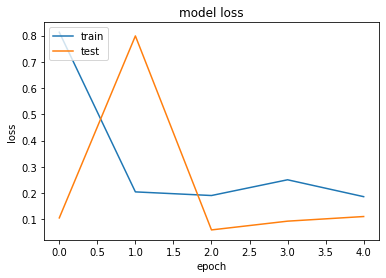

In [ ]:
import matplotlib.pyplot as plt
# under fitting, over fitting, or good fitting
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.history.history

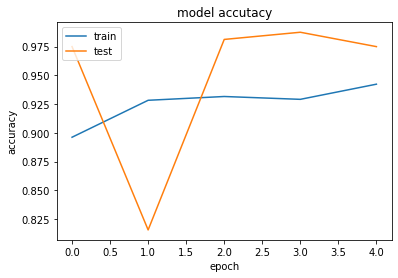

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accutacy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
model.history.history

{}

Saving WhatsApp Image 2020-07-29 at 21.07.49.jpeg to WhatsApp Image 2020-07-29 at 21.07.49 (3).jpeg
WhatsApp Image 2020-07-29 at 21.07.49.jpeg
[[0. 0. 1.]]
Scissors


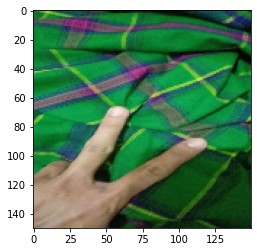

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  print(classes)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  else:
    print('Scissors')